In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')


# 1.  Data Exploration & Understanding 

In [2]:
# Importing dataset 

data = pd.read_csv('laptop.csv')

In [3]:

print(data.head())
print('\nShape of data',data.shape)

   Unnamed: 0.1  Unnamed: 0 Company   TypeName Inches  \
0             0         0.0   Apple  Ultrabook   13.3   
1             1         1.0   Apple  Ultrabook   13.3   
2             2         2.0      HP   Notebook   15.6   
3             3         3.0   Apple  Ultrabook   15.4   
4             4         4.0   Apple  Ultrabook   13.3   

                     ScreenResolution                         Cpu   Ram  \
0  IPS Panel Retina Display 2560x1600        Intel Core i5 2.3GHz   8GB   
1                            1440x900        Intel Core i5 1.8GHz   8GB   
2                   Full HD 1920x1080  Intel Core i5 7200U 2.5GHz   8GB   
3  IPS Panel Retina Display 2880x1800        Intel Core i7 2.7GHz  16GB   
4  IPS Panel Retina Display 2560x1600        Intel Core i5 3.1GHz   8GB   

                Memory                           Gpu  OpSys  Weight  \
0            128GB SSD  Intel Iris Plus Graphics 640  macOS  1.37kg   
1  128GB Flash Storage        Intel HD Graphics 6000  macOS  1.3

In [4]:
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0.1      1303 non-null   int64  
 1   Unnamed: 0        1273 non-null   float64
 2   Company           1273 non-null   object 
 3   TypeName          1273 non-null   object 
 4   Inches            1273 non-null   object 
 5   ScreenResolution  1273 non-null   object 
 6   Cpu               1273 non-null   object 
 7   Ram               1273 non-null   object 
 8   Memory            1273 non-null   object 
 9   Gpu               1273 non-null   object 
 10  OpSys             1273 non-null   object 
 11  Weight            1273 non-null   object 
 12  Price             1273 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB
None


In [5]:
data.isnull().sum()


Unnamed: 0.1         0
Unnamed: 0          30
Company             30
TypeName            30
Inches              30
ScreenResolution    30
Cpu                 30
Ram                 30
Memory              30
Gpu                 30
OpSys               30
Weight              30
Price               30
dtype: int64

# Conclusion:
Column Unnamed: 0.1  Unnamed: 0 are not required into the model training we can drop them, all the column have null values so need to implement some imputaion techniques on it.

In [6]:
data.describe()

,Unnamed: 0.1,Unnamed: 0,Price
count,1303.00000,1273.000000,1273.000000
mean,651.00000,652.674784,59955.814073
std,376.28801,376.493027,37332.251005
min,0.00000,0.000000,9270.720000
25%,325.50000,327.000000,31914.720000
50%,651.00000,652.000000,52161.120000
75%,976.50000,980.000000,79333.387200
max,1302.00000,1302.000000,324954.720000


# 2. Data Preprocessing & Feature Engineering 

In [7]:
data['Company']=data['Company'].fillna(data['Company'].mode()[0])
data['TypeName']=data['TypeName'].fillna(data['TypeName'].mode()[0])
data['Price']=data['Price'].fillna(data['Price'].mean())
data['ScreenResolution']=data['ScreenResolution'].fillna(data['ScreenResolution'].mode()[0])
data['Cpu']=data['Cpu'].fillna(data['Cpu'].mode()[0])
data['Memory']=data['Memory'].fillna(data['Memory'].mode()[0])
data['Gpu']=data['Gpu'].fillna(data['Gpu'].mode()[0])
data['OpSys']=data['OpSys'].fillna(data['OpSys'].mode()[0])
data['Ram'] = data['Ram'].fillna(data['Ram'].mode()[0])
data['Inches'] = data['Inches'].fillna(data['Ram'].mode()[0])

In [8]:
data.isnull().sum()

Unnamed: 0.1         0
Unnamed: 0          30
Company              0
TypeName             0
Inches               0
ScreenResolution     0
Cpu                  0
Ram                  0
Memory               0
Gpu                  0
OpSys                0
Weight              30
Price                0
dtype: int64

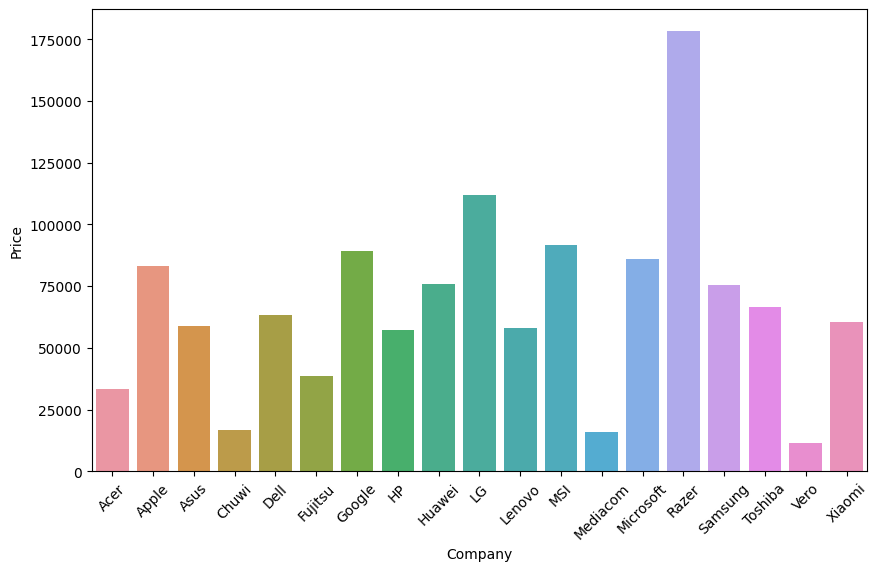

In [9]:
# Lets check the relatioship between different features and the target 
plt.figure(figsize=(10,6))
plt.style.use('default')
com_group_data = data.groupby('Company')['Price'].mean().reset_index()
sns.barplot(x = 'Company',y='Price',data = com_group_data)
plt.xticks(rotation=45)
plt.show()

#Conclusion:
As per the visuals the comapny brand is really making difference in the price of laptop.

In [10]:
# Lets check how the Ram of laptop is changing the price of laptop 
Ram_group_data = data.groupby(['Ram'])['Price'].mean().reset_index()

Ram_group_data.head()

,Ram,Price
0,12GB,66037.277952
1,16GB,103158.266994
2,1GB,53226.720000
3,24GB,117553.440000
4,2GB,14756.743636


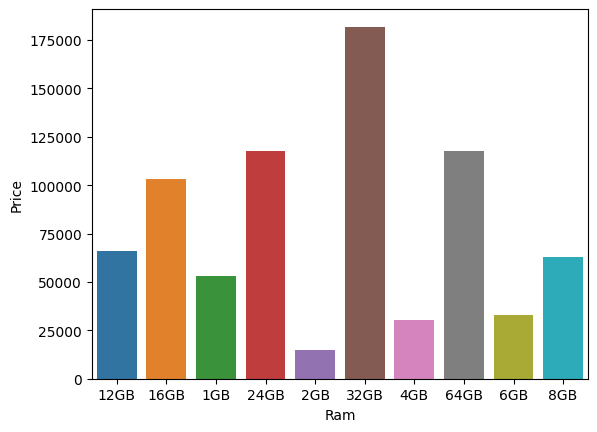

In [11]:
# Trend line for laptop price as per Ram 
sns.barplot(x= Ram_group_data['Ram'],y = Ram_group_data['Price'])
plt.show()


In [12]:
type_name_grouped = data.groupby('TypeName')['Price'].mean().reset_index()
type_name_grouped.head()

,TypeName,Price
0,2 in 1 Convertible,68186.738110
1,Gaming,92204.328662
2,Netbook,34884.858000
3,Notebook,42291.550391
4,Ultrabook,82926.038073


<Axes: xlabel='TypeName', ylabel='Price'>

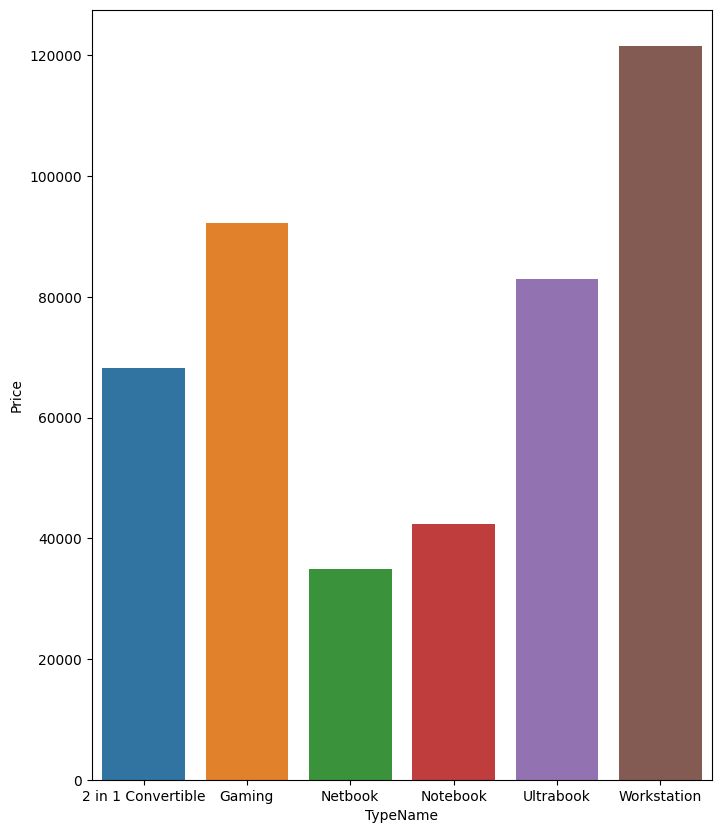

In [13]:
plt.figure(figsize=(8,10))
sns.barplot(x='TypeName',y='Price',data=type_name_grouped)


<Axes: xlabel='Price', ylabel='ScreenResolution'>

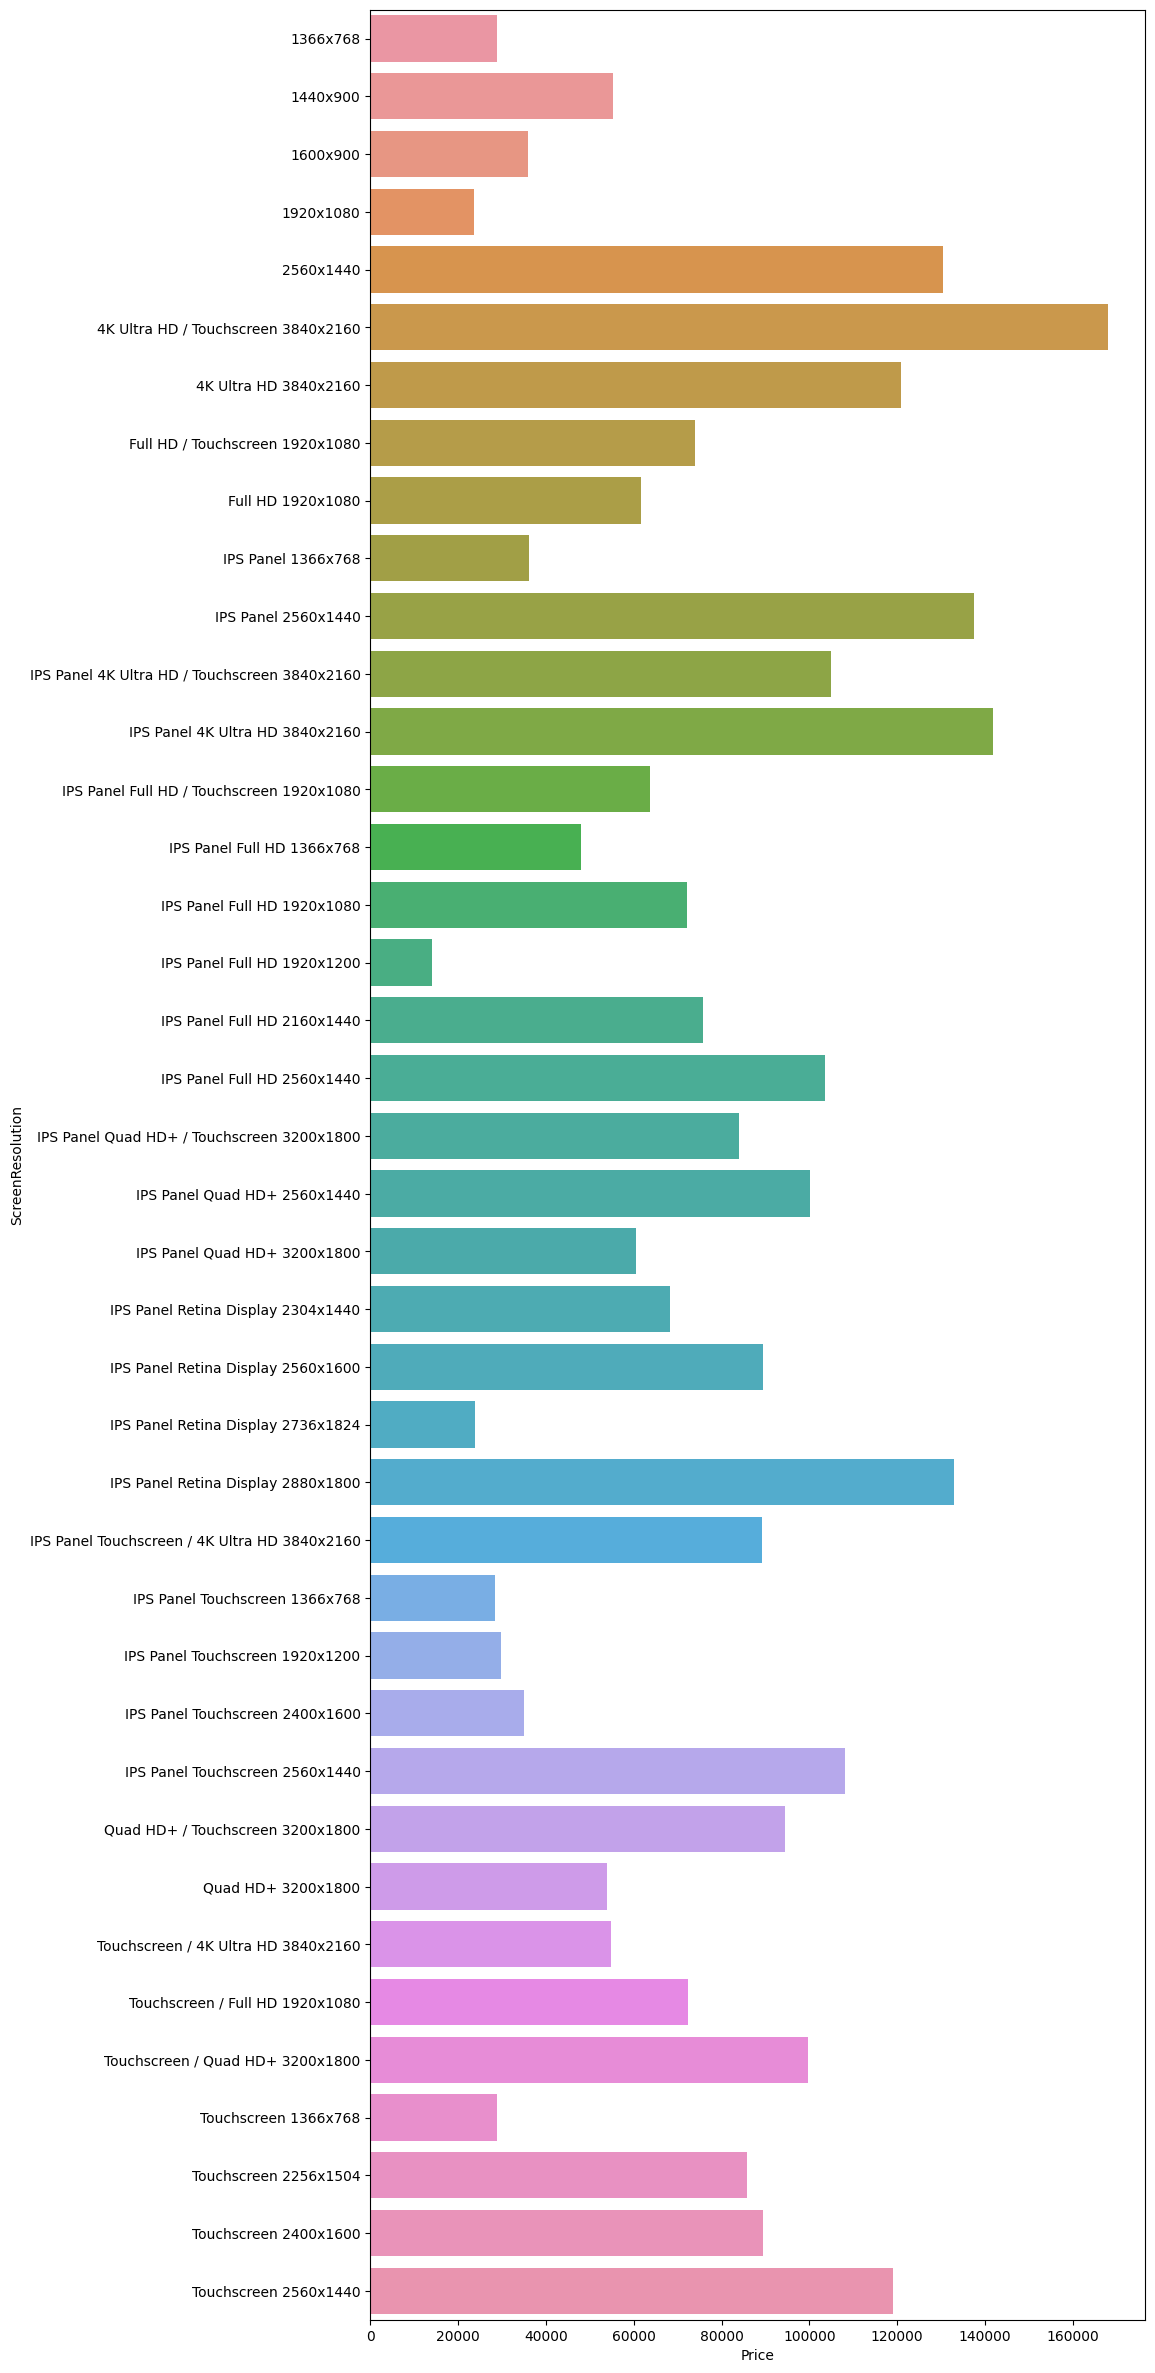

In [14]:
ScreenResolution_encod = data.groupby('ScreenResolution')['Price'].mean().reset_index()
plt.figure(figsize=(10,30))
sns.barplot(x='Price',y='ScreenResolution',data=ScreenResolution_encod,orient='h')


In [15]:
# we dont need column Unnamed: 0.1','Unnamed: 0

data.rename(columns={' Unnamed: 0.1':'Unnamed_0','Unnamed: 0':'Unnamed_0'},inplace=True)

In [16]:
data.drop(columns=['Unnamed_0'],inplace=True)
data.drop(columns=['Unnamed: 0.1'],inplace=True)

In [17]:
data.drop(columns=['Weight'],inplace=True)

In [18]:
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,96095.8080


In [19]:
data['Ram'] = data['Ram'].str.replace('GB','')

In [20]:
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,96095.8080


In [21]:
data['Inches'].unique()

array(['13.3', '15.6', '15.4', '14', '12', '8GB', '17.3', '13.5', '12.5',
       '13', '18.4', '13.9', '11.6', '25.6', '35.6', '12.3', '27.3', '24',
       '33.5', '?', '31.6', '17', '15', '14.1', '11.3', '10.1'],
      dtype=object)

In [22]:
data['Inches'] = data['Inches'].str.replace('GB','')
data['Inches'] = data['Inches'].replace('?',np.nan)

In [23]:
data['Inches'] = data['Inches'].fillna(data['Inches'].mode()[0])

In [24]:
data['Inches']=data['Inches'].astype(float)
data['Ram'] = data['Ram'].astype(int)

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Price             1303 non-null   float64
dtypes: float64(2), int32(1), object(7)
memory usage: 96.8+ KB


# 3. Model Training and fine tuning 

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [27]:
x = data.drop(columns=['Price'])
y = data['Price']

In [28]:
x['Inches'] = x['Inches'].fillna(data['Inches'].mode()[0])

In [29]:
x.isnull().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
dtype: int64

In [30]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [31]:
x.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS


In [32]:
data.isnull().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Price               0
dtype: int64

In [33]:
ohe = OneHotEncoder()
ohe.fit(x[['Company','TypeName','ScreenResolution','Cpu','Memory','Gpu','OpSys']])

OneHotEncoder()

In [34]:
trans_column = make_column_transformer((OneHotEncoder(categories=ohe.categories_),['Company','TypeName','ScreenResolution','Cpu','Memory','Gpu','OpSys']),remainder='passthrough')

In [35]:
Lr = LinearRegression()

In [36]:
pipe = make_pipeline(trans_column,Lr)

In [37]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Acer', 'Apple', 'Asus', 'Chuwi', 'Dell', 'Fujitsu', 'Google',
       'HP', 'Huawei', 'LG', 'Lenovo', 'MSI', 'Mediacom', 'Microsoft',
       'Razer', 'Samsung', 'Toshiba', 'Vero', 'Xiaomi'], dtype=object),
                                                                            array(['2 in 1 Convertible', 'Gaming', '...
       'Nvidia Quadro M2200', 'Nvidia Quadro M2200M',
       'Nvidia Quadro M3000M', 'Nvidia Quadro M500M',
       'Nvidia Quadro M520M', 'Nvidia Quadro M620', 'Nvidia Quadro M620M'],
      dtype=object),
                                                                            array(['Android', 'Chrome OS', 'Linux', 'Mac OS X', 'No OS', 'Windows 10',
       'Windows 10 S', 'Windows 7', 'macOS'], dtype=object)]),
                                                  ['Company', 'TypeName',
                                                   'ScreenResolution', 'Cpu',
                                                   'Memory', 'Gpu',
                                                   'OpSys'])])),
                ('linearregression', LinearRegression())])

In [38]:
y_pred = pipe.predict(x_test)

In [39]:
# Checking r2_score for LinearRegression model 

print('R2_score for LinearRegression model: ',r2_score(y_test,y_pred))

R2_score for LinearRegression model:  0.7888553873830121


In [40]:
# Mean_squared error 

print('Mean_Squared error for LinearRegression: ',mean_squared_error(y_test,y_pred))

Mean_Squared error for LinearRegression:  230194464.03784227


In [41]:
# Dumping the pipeline 

import pickle 


In [42]:
pickle.dump(pipe,open('LinearRegressionModel.pkl','wb'))

In [43]:
pipe.predict(pd.DataFrame([['Apple','Ultrabook',13.3,'IPS Panel Retina Display 2560x1600','Intel Core i5 2.3GHz',8,'128GB SSD','Intel Iris Plus Graphics 640','macOS']],
                            columns=['Company','TypeName','Inches','ScreenResolution','Cpu','Ram','Memory','Gpu','OpSys']))

array([82519.30433859])

Text(0, 0.5, 'Y_pred')

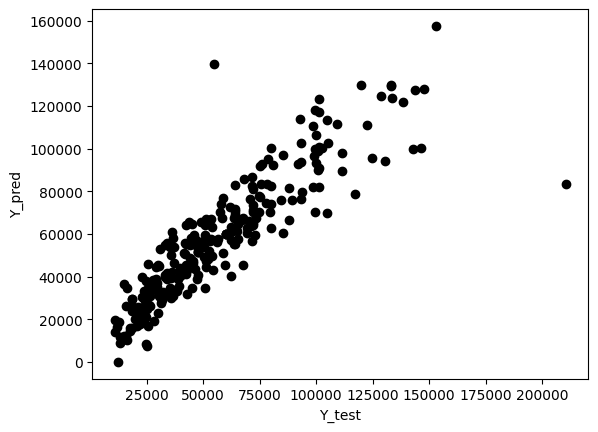

In [44]:
plt.scatter(y_test,y_pred,color='black')
plt.xlabel('Y_test')
plt.ylabel('Y_pred')

In [45]:
# Lets try fitting RandomForest Regressor over the same data 
from sklearn.ensemble import RandomForestRegressor 

In [46]:
rf = RandomForestRegressor(n_estimators=100,random_state=42)

In [47]:
pipe1 = make_pipeline(trans_column,rf)

In [48]:
pipe1.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Acer', 'Apple', 'Asus', 'Chuwi', 'Dell', 'Fujitsu', 'Google',
       'HP', 'Huawei', 'LG', 'Lenovo', 'MSI', 'Mediacom', 'Microsoft',
       'Razer', 'Samsung', 'Toshiba', 'Vero', 'Xiaomi'], dtype=object),
                                                                            array(['2 in 1 Convertible', 'Gaming', '...
       'Nvidia Quadro M3000M', 'Nvidia Quadro M500M',
       'Nvidia Quadro M520M', 'Nvidia Quadro M620', 'Nvidia Quadro M620M'],
      dtype=object),
                                                                            array(['Android', 'Chrome OS', 'Linux', 'Mac OS X', 'No OS', 'Windows 10',
       'Windows 10 S', 'Windows 7', 'macOS'], dtype=object)]),
                                                  ['Company', 'TypeName',
                                                   'ScreenResolution', 'Cpu',
                                                   'Memory', 'Gpu',
                                                   'OpSys'])])),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

In [49]:
# Predict the price from RandomForest 
y_pred1 = pipe1.predict(x_test)

In [50]:
# R2_score 
print('r2_score for RandomForestRegressor: ', r2_score(y_test,y_pred1))

r2_score for RandomForestRegressor:  0.8320422772519246


In [51]:
pipe1.predict(pd.DataFrame([['Apple','Ultrabook',13.3,'IPS Panel Retina Display 2560x1600','Intel Core i5 2.3GHz',8,'128GB SSD','Intel Iris Plus Graphics 640','macOS']],
                            columns=['Company','TypeName','Inches','ScreenResolution','Cpu','Ram','Memory','Gpu','OpSys']))

array([65620.788192])

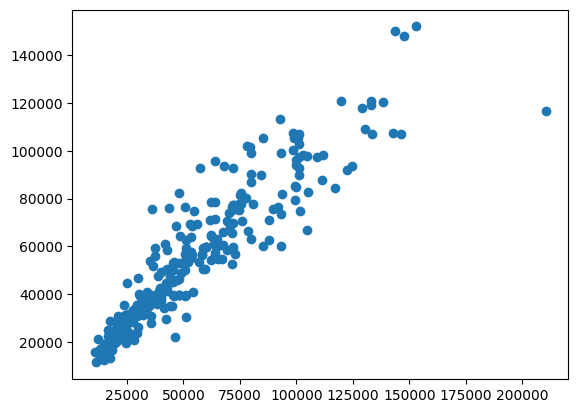

In [52]:
plt.scatter(y_test,y_pred1)

In [54]:
pickle.dump(pipe1,open('RandomForestRegressor.pkl','wb'))